# Batch processing

## Step 1: Detect Onset-Offset events in behavioral files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# Directory where CSV files are located
directory_path = 'H:/Magdalena/photometry/video_analysis_frames'

# List of behavior columns in your dataset
behavior_columns = ['background', 'approach', 'nose-nose', 'nose-tail', 'general', 'fight']

# Function to process each CSV file
def process_csv_file(data_path):
    data = pd.read_csv(data_path)
    behavior_events = []

    for col in behavior_columns:
        # Check if the column exists in the DataFrame
        if col not in data.columns:
            print(f"Warning: Column '{col}' not found in {data_path}. Skipping this column.")
            continue

        onset_indices = data.index[data[col].diff() == 1].tolist()
        offset_indices = data.index[data[col].diff() == -1].tolist()

        if data[col].iloc[0] == 1:
            onset_indices = [0] + onset_indices
        if data[col].iloc[-1] == 1:
            offset_indices = offset_indices + [data.index[-1]]

        for start, end in zip(onset_indices, offset_indices):
            behavior_events.append({
                'Behavior': col,
                'Onset': start,
                'Offset': end
            })

    if behavior_events:  # Check if there are any events to save
        behavior_events_df = pd.DataFrame(behavior_events)
        base_name = os.path.splitext(data_path)[0]
        output_path = f'{base_name}_events.csv'
        behavior_events_df.to_csv(output_path, index=False)
        print(f'Behavior events saved to {output_path}')
    else:
        print(f"No behavior events found in {data_path}. No file created.")

    behavior_events_df = pd.DataFrame(behavior_events)
    base_name = os.path.splitext(data_path)[0]
    output_path = f'{base_name}_events.csv'
    behavior_events_df.to_csv(output_path, index=False)

# Search for all CSV files in the directory and its subdirectories
csv_files = glob.glob(f'{directory_path}/**/*.csv', recursive=True)

# Process each CSV file found
# Process each CSV file found, ignoring files that end with '_events.csv'
for file_path in csv_files:
    if not file_path.endswith('_events.csv'):
        process_csv_file(file_path)


Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\DA\sham\C171M1-r-2023-12-01-085245_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\DA\sham\C171M2-r-2023-12-01-091318_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\DA\sham\C171M3-r-2023-12-01-112503_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M1-r-2023-12-01-100015_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M2-r-2023-12-01-102246_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M3-r-2023-12-01-104459_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M4-r-2023-12-01-110519_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_frames\eCB\sham\C180dupM1-r-2024-01-24-140127_events.csv
Behavior events saved to H:/Magdalena/photometry/video_analysis_

### Run with CAUTION! Delete all files ending with '_events.csv' in the directory and its subdirectories

In [19]:
# Delete all files ending with '_events.csv' in the directory and its subdirectories

import os
import glob

# Directory where CSV files are located
directory_path = 'H:/Magdalena/photometry/video_analysis_frames'

# Search for all files ending with '_events.csv' in the directory and its subdirectories
events_files = glob.glob(f'{directory_path}/**/*_events.csv', recursive=True)

# Delete each file found
for file_path in events_files:
    try:
        os.remove(file_path)
        print(f'Deleted {file_path}')
    except Exception as e:
        print(f'Error deleting {file_path}: {e}')


Deleted H:/Magdalena/photometry/video_analysis_frames\DA\sham\C171M1-r-2023-12-01-085245_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\sham\C171M2-r-2023-12-01-091318_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\sham\C171M3-r-2023-12-01-112503_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M1-r-2023-12-01-100015_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M2-r-2023-12-01-102246_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M3-r-2023-12-01-104459_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\DA\SNI\C172M4-r-2023-12-01-110519_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\eCB\sham\C180dupM1-r-2024-01-24-140127_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\eCB\sham\C180dupM2-r-2024-01-24-142142_events.csv
Deleted H:/Magdalena/photometry/video_analysis_frames\eCB\sham\C205dupM1-r-2024-01-23-135232_eve

In [4]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from data_import import import_ppd

def process_ppd_file(ppd_file_path):
    data = import_ppd(ppd_file_path, low_pass=20, high_pass=0.001)
    filename = os.path.splitext(os.path.basename(ppd_file_path))[0]
    sampling_rate = data['sampling_rate']
    time = np.arange(len(data['analog_1'])) / sampling_rate
    
    reg = np.polyfit(data['analog_2'], data['analog_1'], 1)
    fit_405 = reg[0] * data['analog_2'] + reg[1]
    dFF = (data['analog_1'] - fit_405) / fit_405
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(time, data['analog_1'], label='analog_1')
    ax1.plot(time, data['analog_2'], label='analog_2')
    ax1.plot(time, fit_405, label='fit_405')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Value')
    ax1.set_title('Analog Signals and Fit')
    ax1.legend()
    
    ax2.plot(time, dFF, label='dFF')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('dFF')
    ax2.set_title('dFF')
    ax2.legend()
    
    plt.tight_layout()
    fig.suptitle(filename)
    
    save_path = os.path.join(os.path.dirname(ppd_file_path), filename + '.png')
    fig.savefig(save_path, dpi=300)
    plt.close()

    print(f"Processed and saved: {save_path}")

directory_path = 'H:/Magdalena/photometry/fp_recordings'
ppd_files = glob.glob(os.path.join(directory_path, '**', '*.ppd'), recursive=True)

for ppd_file_path in ppd_files:
    process_ppd_file(ppd_file_path)


Processed and saved: H:/Magdalena/photometry/fp_recordings\DA\sham\C171M1-r-2023-12-01-085245.png
Processed and saved: H:/Magdalena/photometry/fp_recordings\DA\sham\C171M2-r-2023-12-01-091318.png
Processed and saved: H:/Magdalena/photometry/fp_recordings\DA\sham\C171M3-r-2023-12-01-112503.png
Processed and saved: H:/Magdalena/photometry/fp_recordings\DA\SNI\C172M1-r-2023-12-01-100015.png
Processed and saved: H:/Magdalena/photometry/fp_recordings\DA\SNI\C172M2-r-2023-12-01-102246.png
Processed and saved: H:/Magdalena/photometry/fp_recordings\DA\SNI\C172M3-r-2023-12-01-104459.png
Processed and saved: H:/Magdalena/photometry/fp_recordings\DA\SNI\C172M4-r-2023-12-01-110519.png
Processed and saved: H:/Magdalena/photometry/fp_recordings\eCB\sham\C180dupM1-r-2024-01-24-140127.png
Processed and saved: H:/Magdalena/photometry/fp_recordings\eCB\sham\C180dupM2-r-2024-01-24-142142.png
Processed and saved: H:/Magdalena/photometry/fp_recordings\eCB\sham\C205dupM1-r-2024-01-23-135232.png
Processed an

In [2]:
# Value to be subtracted from all onset and offset values
led_events_path = r'H:\Magdalena\photometry\LED_Event_Detection_Results.xlsx'
led_events_df = pd.read_excel(led_events_path)


    # Find the row in the Excel file where the first column matches filename_base
    row = led_events_df[led_events_df.iloc[:, 0] == filename_base]
    if not row.empty:
        # Extract the led_on value from the row
        led_on = row['led_on'].values[0]
        led_off = row['led_off'].values[0]
        fps = row['fps'].values[0]
        # Subtract the value from all onset and offset values as needed in your processing
        # You may need to adjust the logic below to fit your specific processing requirements
        print(f"{filename_base}: LED on at {led_on}")
    else:
        print(f"{filename_base} not found in LED event detection results.")
        # Handle cases where the filename is not found in the Excel file
        led_on = None  # Or set a default value as needed for your processing


# Load the behavior events CSV file
events_path = r'C:\Users\huang\codes\nevian_lab\Magdalena_fp\C204M1 social_labels_events.csv'  # Update this with the path to your events file
events_data = pd.read_csv(events_path)

# Subtract 'led_on' from all onset and offset values
events_data['Onset'] = (events_data['Onset'] - led_on) / fps * sampling_rate
events_data['Offset'] = (events_data['Offset'] - led_on) / fps * sampling_rate

# Unique behaviors in the dataset
unique_behaviors = events_data['Behavior'].unique()

# Initialize a dictionary to store arrays for each behavior
behavior_arrays = {}

# Iterate over each unique behavior to create arrays
for behavior in unique_behaviors:
    # Filter the DataFrame for the current behavior
    filtered_events = events_data[events_data['Behavior'] == behavior]
    
    # Create a NumPy array with onset and offset values
    behavior_array = np.column_stack((filtered_events['Onset'].values, filtered_events['Offset'].values))
    
    # Store the array in the dictionary
    behavior_arrays[behavior] = behavior_array

# Example: Accessing the array for the 'background' behavior
background_array = behavior_arrays['background']

print("Array for 'background' behavior:", background_array)


trace_duration = 15  # 5 seconds before and 10 seconds after each data index


# Convert trace duration from seconds to data points
trace_duration_points = trace_duration * sampling_rate

# Create an empty matrix to store trace data
trace_data_matrix = []

pre_start = 5
post_start = 10

# Ensure each trace has the same number of points
num_points_per_trace = pre_start * sampling_rate + post_start * sampling_rate

# Initialize list to store fixed-length trace data
trace_data_matrix = []

fig, ax = plt.subplots()

for index in behavior_arrays['general'][:, 0]:
    start = int(index - pre_start * sampling_rate)
    end = int(start + num_points_per_trace)  # Ensure fixed length
    if start < 0 or end > len(dFF):  # Skip if trace goes out of bounds
        continue
    trace_data = dFF[start:end]
    time = np.arange(-pre_start, post_start, 1 / sampling_rate)

    baseline_start = int(index - 5 * sampling_rate)
    baseline_end = int(index - 3 * sampling_rate)
    baseline = np.mean(dFF[baseline_start:baseline_end])

    relative_trace_data = trace_data - baseline

    ax.plot(time, relative_trace_data)
    trace_data_matrix.append(relative_trace_data)

ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Relative dFF')
ax.set_title('Traces')
plt.show()

# Now, calculating the average trace should work without error
trace_data_matrix = np.array(trace_data_matrix)  # Convert list to NumPy array for mean calculation
average_trace = np.mean(trace_data_matrix, axis=0)

plt.plot(time, average_trace, label='Average Trace', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Average Relative dFF')
plt.title('Average Trace')
plt.legend()
plt.show()



NameError: name 'sampling_rate' is not defined

In [30]:
behavior_arrays['background'][:,0]

array([-1259.61538462,  1313.46153846,  2121.15384615,  2307.69230769,
        2705.76923077,  3596.15384615,  4932.69230769,  5146.15384615,
        7317.30769231,  7538.46153846,  8582.69230769,  9913.46153846,
       10186.53846154, 11980.76923077, 33948.07692308, 38753.84615385,
       41673.07692308, 44780.76923077, 46140.38461538, 47986.53846154,
       55848.07692308, 60934.61538462])

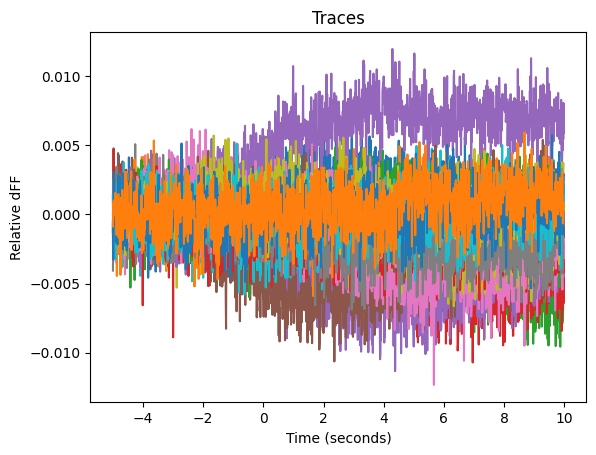

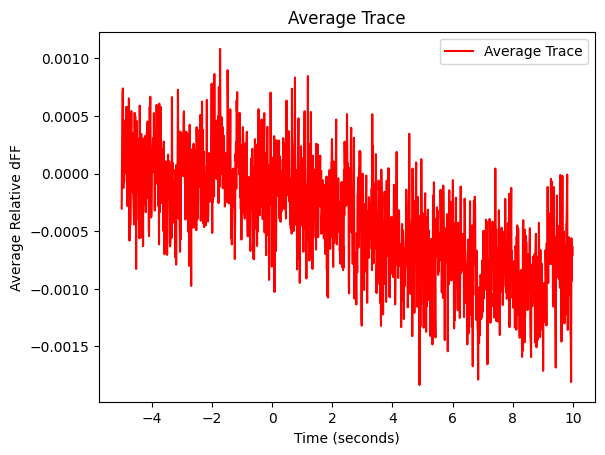

In [6]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter
from data_import import import_ppd  # Ensure this function is correctly implemented

# Load the LED events Excel file
led_events_path = r'H:\Magdalena\photometry\LED_Event_Detection_Results.xlsx'
led_events_df = pd.read_excel(led_events_path)

# Define directories
ppd_directory_path = r'H:/Magdalena/photometry/fp_recordings'
events_directory_path = r'H:/Magdalena/photometry/video_analysis_frames'

# Function to process .ppd files
def process_ppd_file(ppd_file_path, led_events_df, events_directory_path):

    filename_base = os.path.splitext(os.path.basename(ppd_file_path))[0]
    
    data = import_ppd(ppd_file_path, low_pass=20, high_pass=0.001)
    sampling_rate = data['sampling_rate']
    # Convert sample index to time vector
    time = np.arange(len(data['analog_1'])) / sampling_rate
    
    # dFF calculation
    reg = np.polyfit(data['analog_2'], data['analog_1'], 1)
    fit_405 = reg[0] * data['analog_2'] + reg[1]
    dFF = (data['analog_1'] - fit_405) / fit_405
    
    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot analog signals and fit
    ax1.plot(time, data['analog_1'], label='analog_1')
    ax1.plot(time, data['analog_2'], label='analog_2')
    ax1.plot(time, fit_405, label='fit_405')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Value')
    ax1.set_title('Analog Signals and Fit')
    ax1.legend()
    
    # Plot dFF
    ax2.plot(time, dFF, label='dFF')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('dFF')
    ax2.set_title('dFF')
    ax2.legend()
    
    plt.tight_layout()
    fig.suptitle(filename_base)
    
    # Save figure
    save_path = os.path.join(os.path.dirname(ppd_file_path), filename_base + '.png')
    fig.savefig(save_path, dpi=300)
    plt.close()  # Close the plot to save memory

    print(f"Processed and saved: {save_path}")

    row = led_events_df[led_events_df.iloc[:, 0] == filename_base]
    if row.empty:
        print(f"{filename_base} not found in LED event detection results.")
        return

    led_on = row['Onset_Point'].values[0]
    led_off = row['Offset_Point'].values[0]
    fps = row['fps'].values[0]

    events_files = glob.glob(f"{events_directory_path}/**/{filename_base}_events.csv", recursive=True)
    if not events_files:
        print(f"No matching events file found for {filename_base}.")
        return

    for events_file in events_files:
        events_data = pd.read_csv(events_file)
        events_data['Onset'] = (events_data['Onset'] - led_on) / fps * sampling_rate
        events_data['Offset'] = (events_data['Offset'] - led_on) / fps * sampling_rate

        unique_behaviors = events_data['Behavior'].unique()
        behavior_arrays = {}
        for behavior in unique_behaviors:
            filtered_events = events_data[events_data['Behavior'] == behavior]
            behavior_array = np.column_stack((filtered_events['Onset'].values, filtered_events['Offset'].values))
            behavior_arrays[behavior] = behavior_array

        # Example: Processing for 'background' behavior, similar processing required for other behaviors as needed
        if 'background' in behavior_arrays:
            background_array = behavior_arrays['background']

        if 'approach' in behavior_arrays:
            approach_array = behavior_arrays['approach']
        
        if 'nose-nose' in behavior_arrays:
            nose_nose_array = behavior_arrays['nose-nose']
        
        if 'nose-tail' in behavior_arrays:
            nose_tail_array = behavior_arrays['nose-tail']

        if 'general' in behavior_arrays:
            general_array = behavior_arrays['general']
        
        if 'fight' in behavior_arrays:
            fight_array = behavior_arrays['fight']
        
        

        # Additional processing and plotting based on dFF and behavior arrays goes here
        # This is a placeholder for further specific analysis steps you'd like to perform

    print(f"Processed {filename_base}")

# Process each .ppd file found in the directory
for ppd_file_path in glob.glob(os.path.join(ppd_directory_path, '**', '*.ppd'), recursive=True):
    process_ppd_file(ppd_file_path, led_events_df, events_directory_path)


Processed and saved: H:/Magdalena/photometry/fp_recordings\DA\sham\C171M1-r-2023-12-01-085245.png
Array for 'background' behavior: [[ -1416.92307692  36747.69230769]
 [ 38820.          38976.92307692]
 [ 40555.38461538  41053.84615385]
 [ 41178.46153846  41944.61538462]
 [ 42249.23076923  42410.76923077]
 [ 42743.07692308  42992.30769231]
 [ 43061.53846154  43227.69230769]
 [ 43430.76923077  45078.46153846]
 [ 45221.53846154  49264.61538462]
 [ 50284.61538462  50349.23076923]
 [ 50949.23076923  56778.46153846]
 [ 57415.38461538  57424.61538462]
 [ 59741.53846154  59861.53846154]
 [ 60420.          60535.38461538]
 [ 61070.76923077  61135.38461538]
 [ 61283.07692308  61287.69230769]
 [ 63415.38461538  63489.23076923]
 [ 64209.23076923  65533.84615385]
 [ 65580.          65589.23076923]
 [ 65741.53846154  65833.84615385]
 [ 65976.92307692  65981.53846154]
 [ 66115.38461538  66152.30769231]
 [ 67698.46153846  67749.23076923]
 [ 68326.15384615  68520.        ]
 [ 68598.46153846  71081.5384